In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "December"
day = "10"

## Imports and initialization

In [4]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [6]:
import sys
sys.path.append("../../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

# Today's Work

In [7]:
atomlocs = [2, 2, 3, 3, 1]

In [8]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 3 (2_0_rate_measurement):  

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:24:0: on (Y-M-D) 2024-1-31, And ended at 8:30:26: on 2024-1-31
Experiment Notes:  



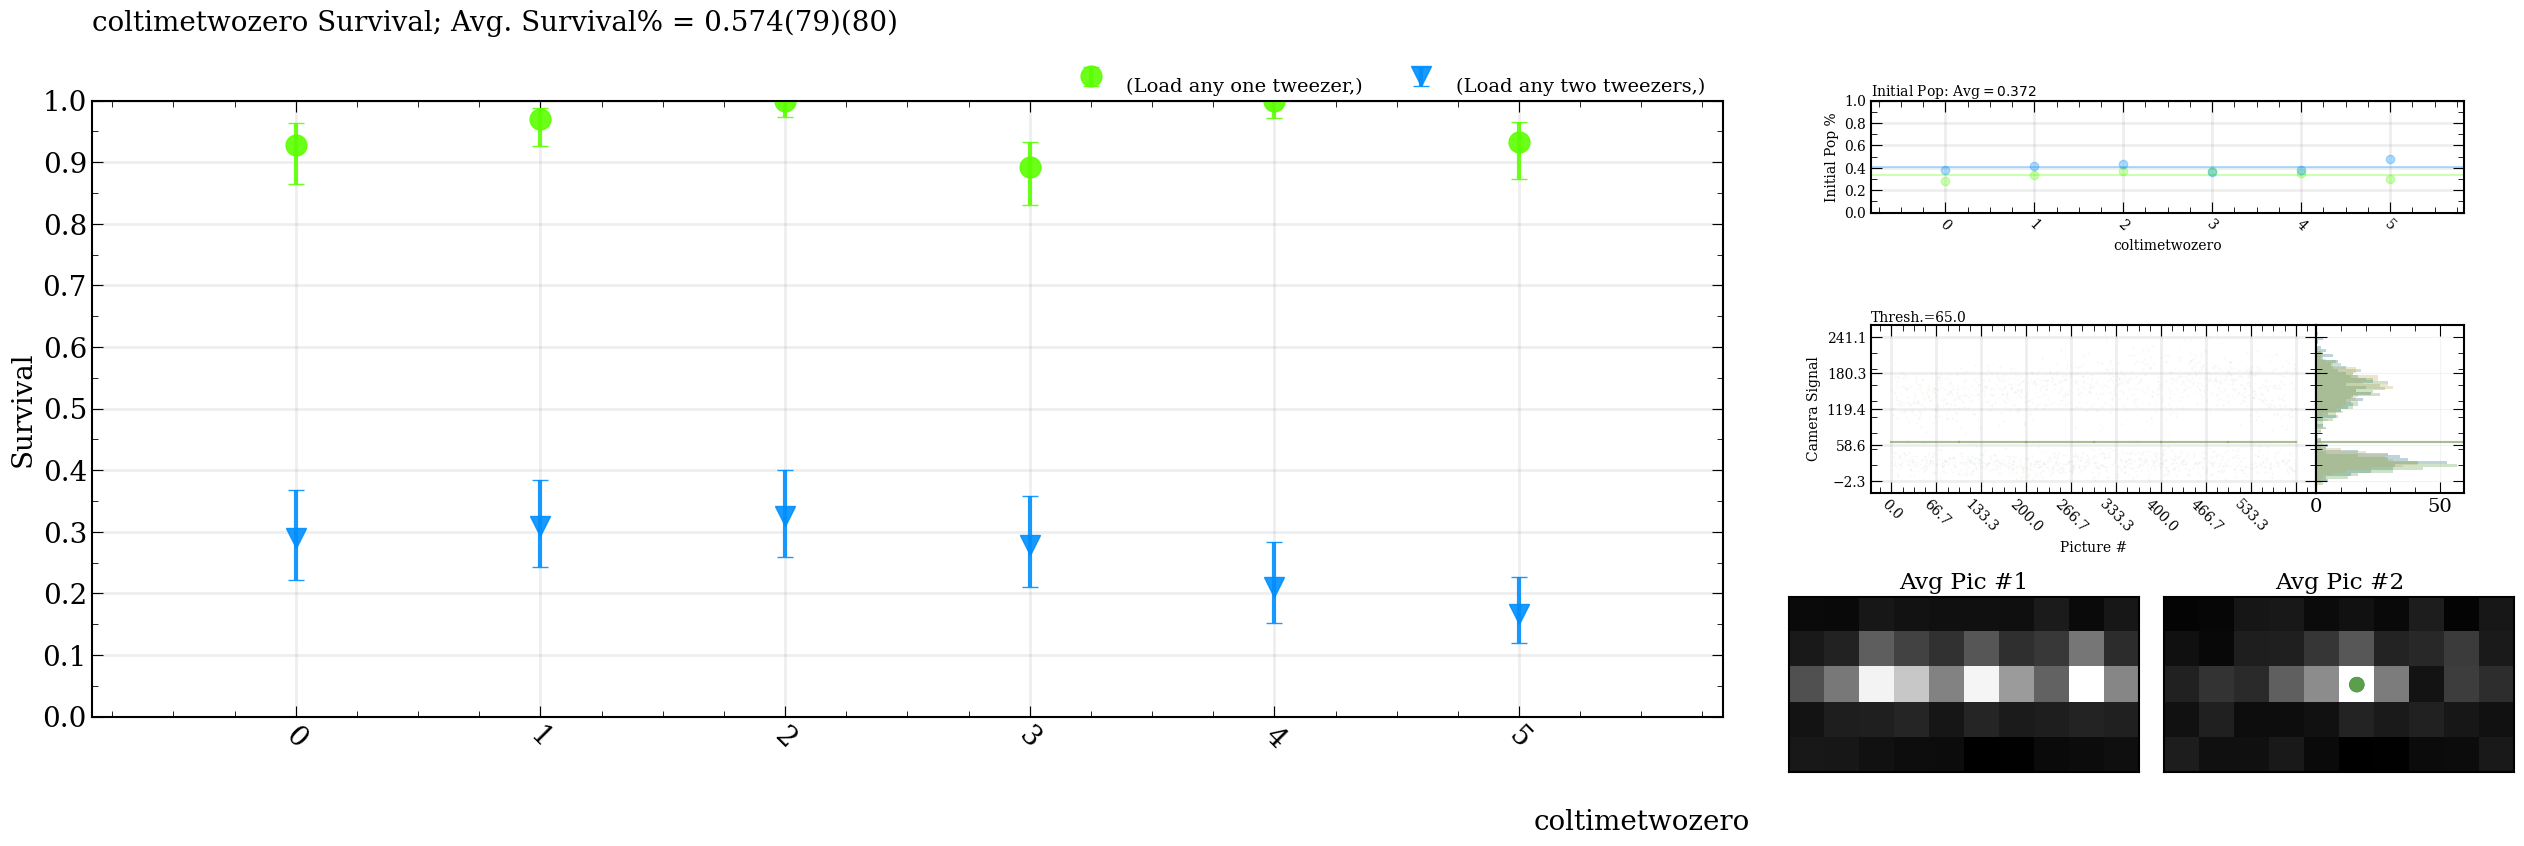

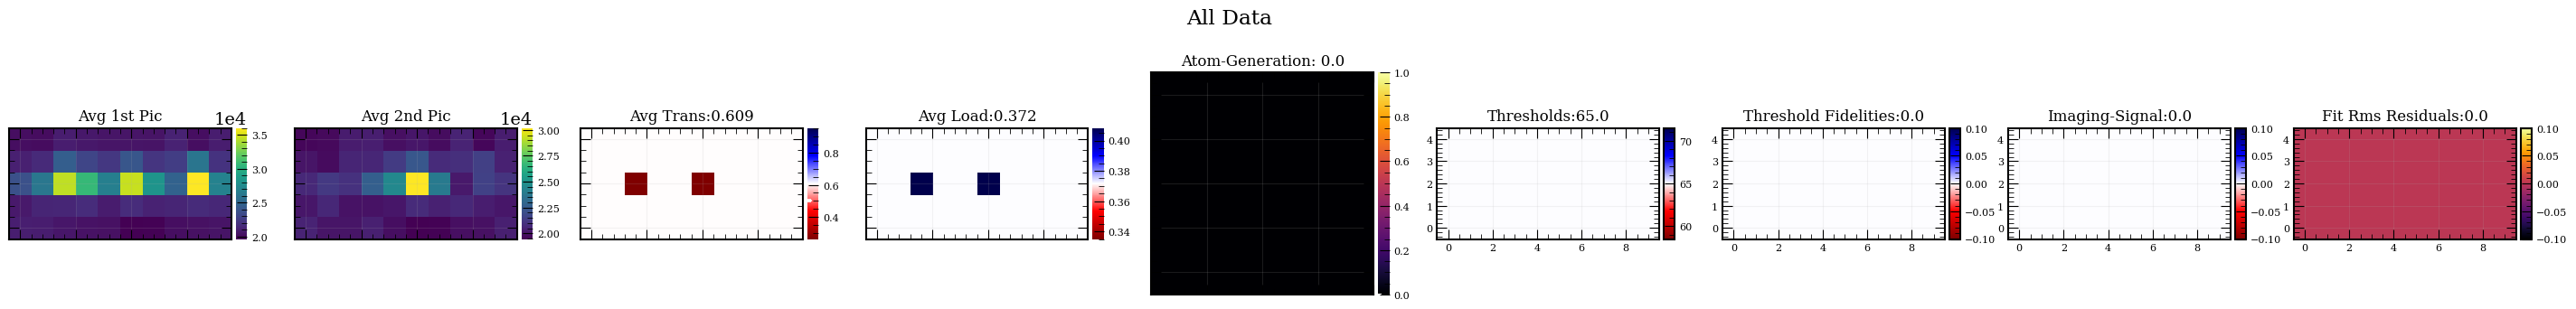

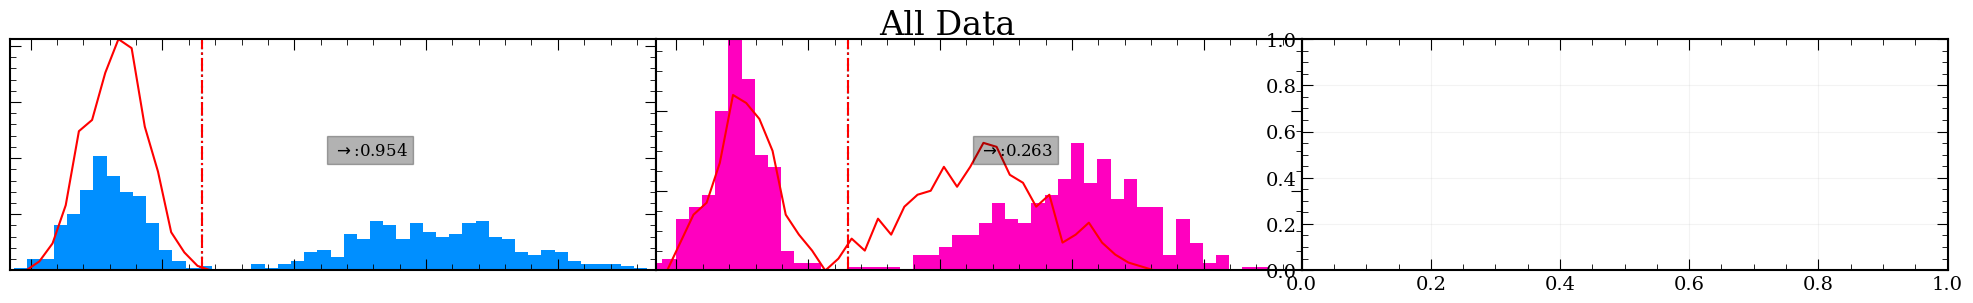

In [86]:
# reloadMyModules(18)
mp.Transfer(3, loadOpt, plotIndvHists = True, plotAvg=False, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 65)]);

In [ ]:
 #18-20 = 0.168
    

beta = 5.891241805055758e-11 +/- 7.36896682768163e-12


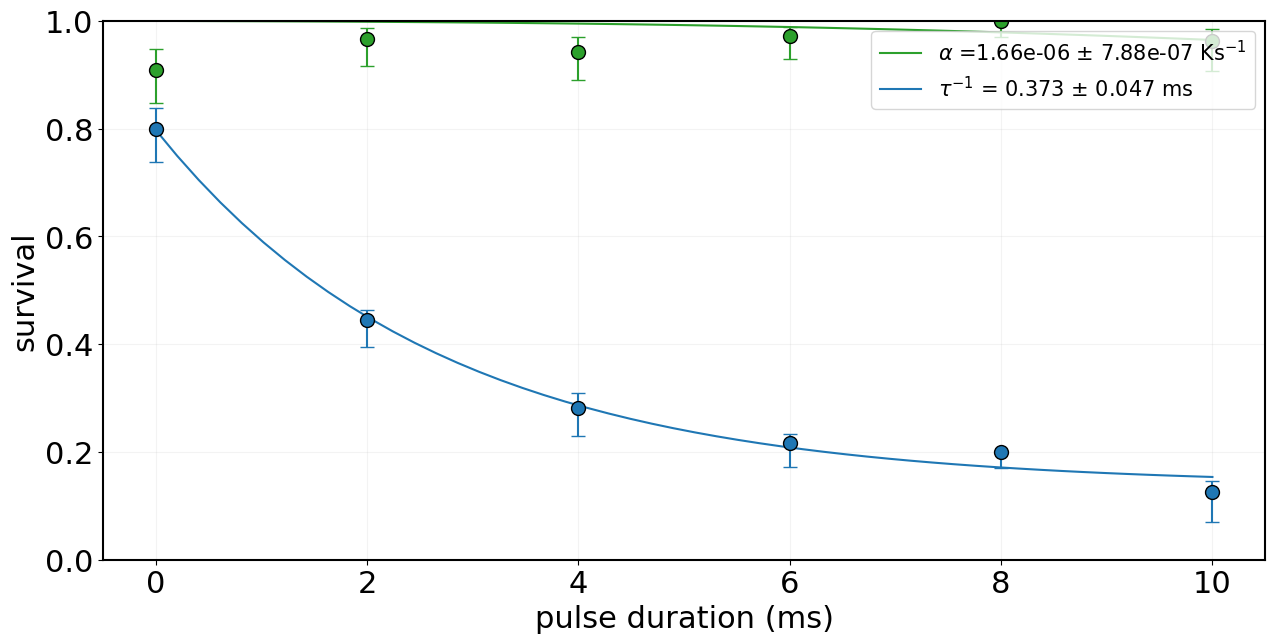

In [641]:
##pulse duration
reloadMyModules(19,'December')
fileId = 6
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.2
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0, T0,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
# plt.title(r'$ \Delta = 315 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta,beta_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta,'+/-',beta_unc)

In [501]:
8*1.53

12.24

In [500]:
bw_38 = lac.betaCalc(1,1e-3,60e-6,decay_unc,U0_unc,T0_unc)
bw_18 = lac.betaCalc(1,.25e-3,20e-6,decay_unc,U0_unc,T0_unc)
print(bw_38)
print(bw_18)
print(bw_18[0]/bw_38[0])

(1.0270457708729024e-10, 2.398055504564774e-11)
(1.5812404060894302e-10, 3.692047976245693e-11)
1.5396007178390005


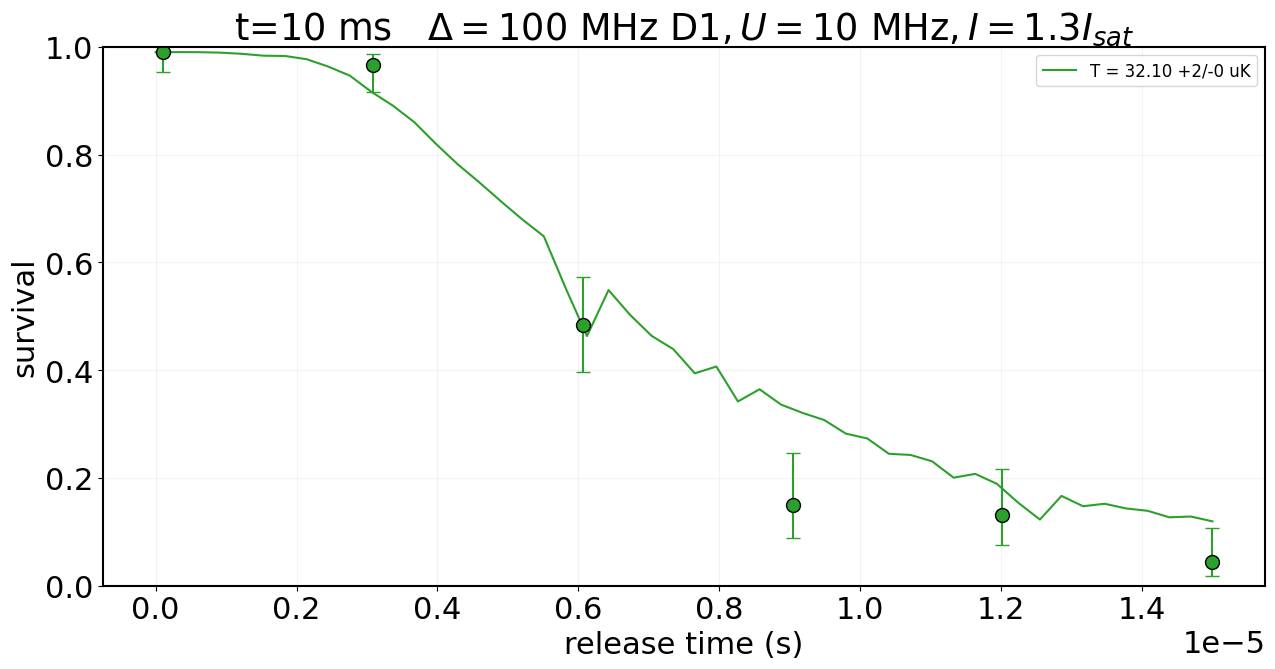

In [174]:
fileId1 = 28
fileId2 = 1 
threshold = 75
x_data1,load_one_y1,load_one_err1,load_two_y1,load_two_err1,surv_unc1 = ta.getCollisionalData(fileId1, loadOneOpt,loadTwoOpt,threshold=threshold);
x_data2,load_one_y2,load_one_err2,load_two_y2,load_two_err2,surv_unc2 = ta.getCollisionalData(fileId2, loadOneOpt,loadTwoOpt,threshold=threshold);
temp_guess1 = 15e-6
trap_depth = .5e-3
load_one_y1[0]=.99

fig,ax = plt.subplots(1, figsize=[15,7])

ax.errorbar(x_data1*1e-3,load_one_y1, yerr=load_one_err1,ls='none',ecolor=color1,marker = 'o',
            markersize = markersize,markerfacecolor=color1,markeredgecolor='k',capsize=capsize)

T,high_unc,low_unc = ah.releaseRecaptureTemp(x_data1,load_one_y1,load_one_err1,tempGuess=temp_guess1,
                        trapDepth=trap_depth,rrange=(1e-6,200e-6,0.2e-6),color=color1,last_index=5)

ax.grid(which='minor', alpha=.1)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r't=10 ms $\ \ \Delta = 100 \ \mathrm{MHz} \ \mathrm{D1}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

T_10ms = T
T_lowunc_10ms = high_unc
T_highunc_10ms = low_unc

# U = 5 MHz 

In [36]:
U0_5 = 0.25e-3
T0_5 = 20e-6
U0_unc=0.04693e-3
T0_unc=7e-6

### 310 MHz

In [ ]:
lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)

beta = 2.6679873314656732e-11 +/- 6.2387694120354025e-12


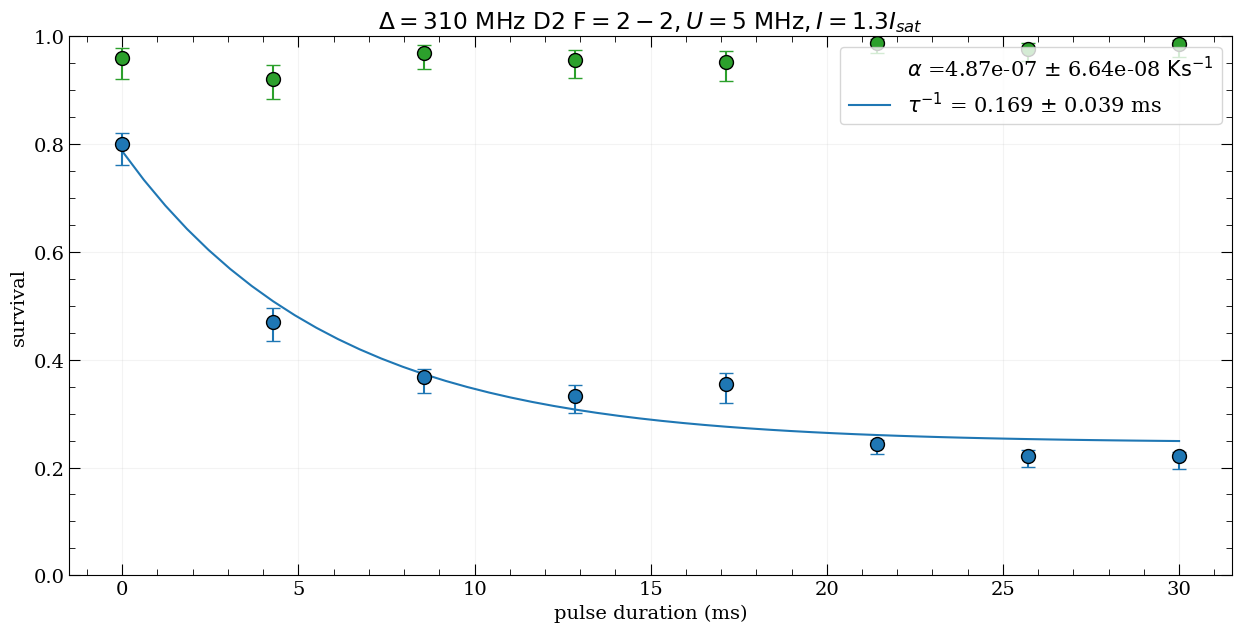

In [38]:
reloadMyModules(10,'December')
fileId = 2
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.25
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 310 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_310,beta_U5_310_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_310,'+/-',beta_U5_310_unc)

### 245 MHz

beta = 3.5039879807087113e-11 +/- 1.1581581594564088e-11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



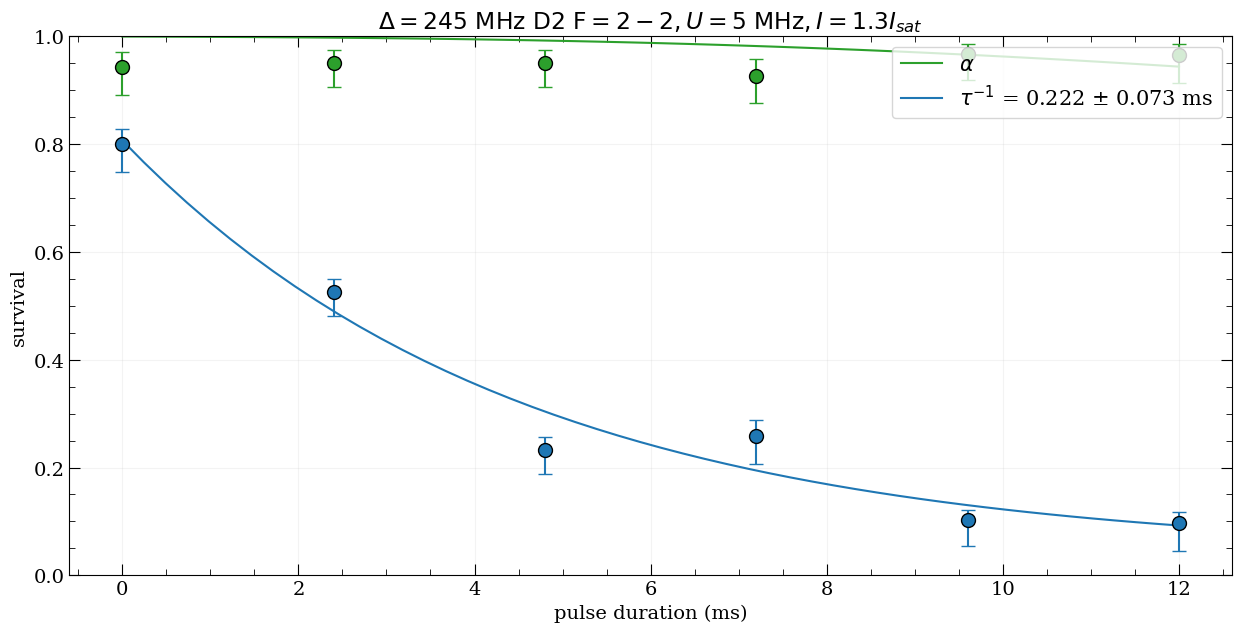

In [39]:
reloadMyModules(18,'December')
fileId = 42
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 245 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_245,beta_U5_245_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_245,'+/-',beta_U5_245_unc)

### 180 MHz

beta = 4.3909263977923404e-11 +/- 1.3814001524329739e-11


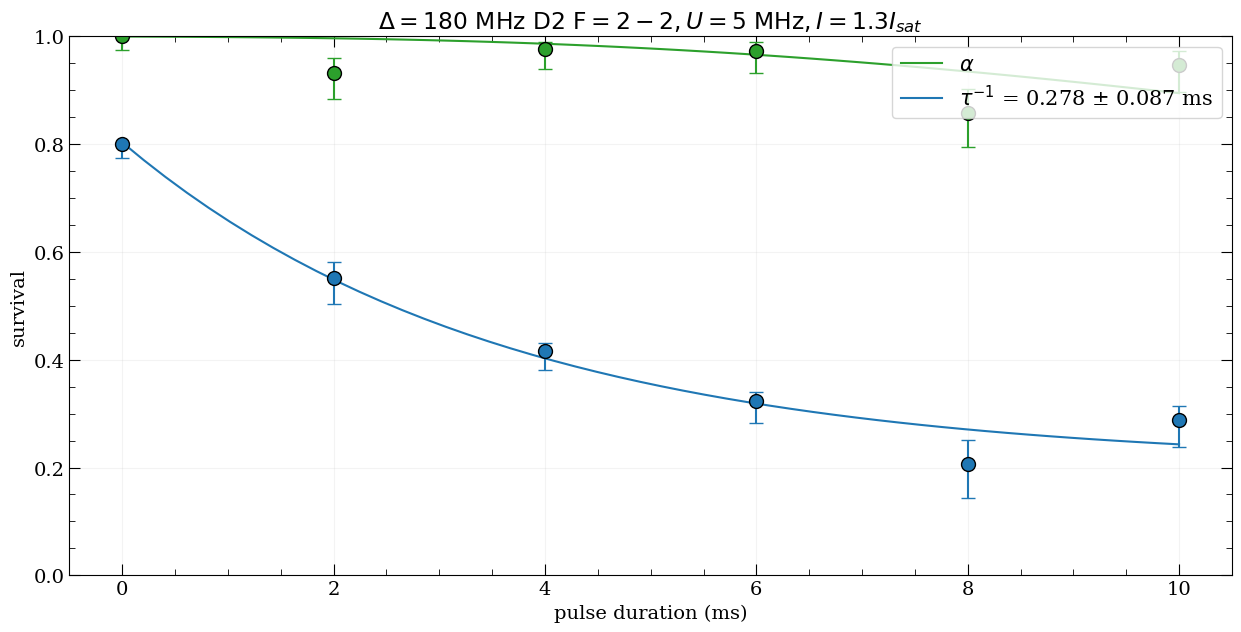

In [40]:
reloadMyModules(18,'December')
fileId = 45
threshold = 75
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.2

num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 180 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_180,beta_U5_180_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_180,'+/-',beta_U5_180_unc)

### 140 MHz

beta = 5.0004446791259897e-11 +/- 1.0336012332493537e-11


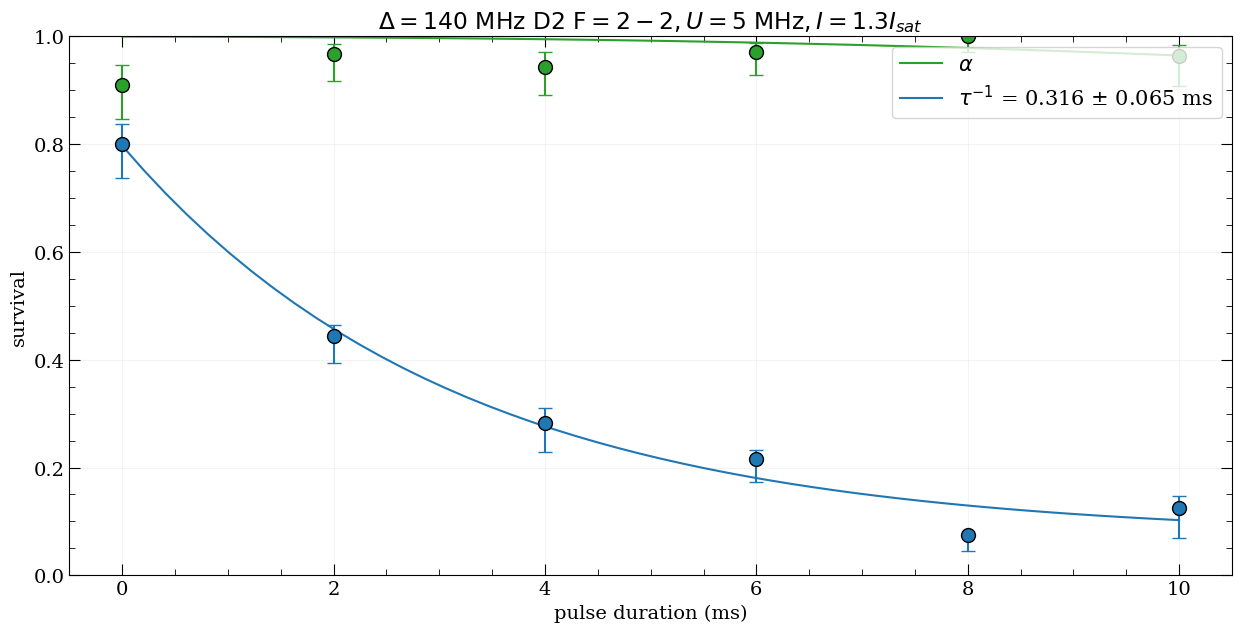

In [41]:
reloadMyModules(19,'December')
fileId = 6
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.2


num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 140 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_140,beta_U5_140_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_140,'+/-',beta_U5_140_unc)

### 115 MHz

beta = 6.736700675363313e-11 +/- 2.448058545912955e-11


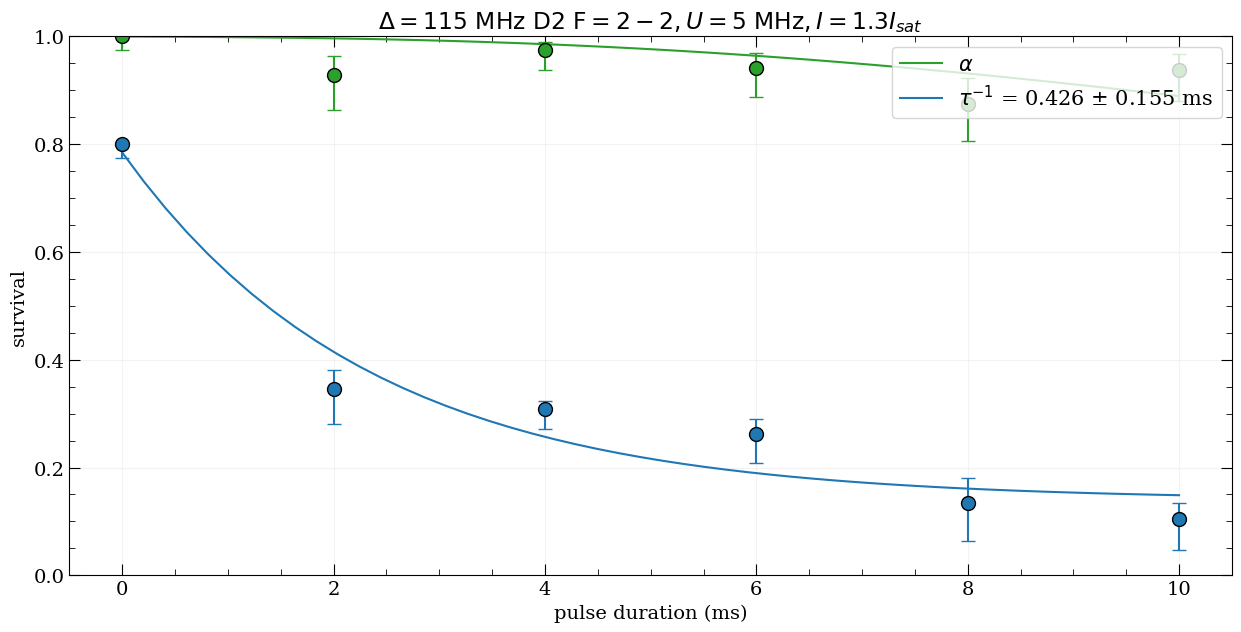

In [42]:
reloadMyModules(18) 
fileId = 26
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
U0=.25e-3
T0=20e-6
U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 115 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_115,beta_U5_115_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_115,'+/-',beta_U5_115_unc)

### 95 MHz

beta = 7.744323480054099e-11 +/- 1.327922194547047e-11


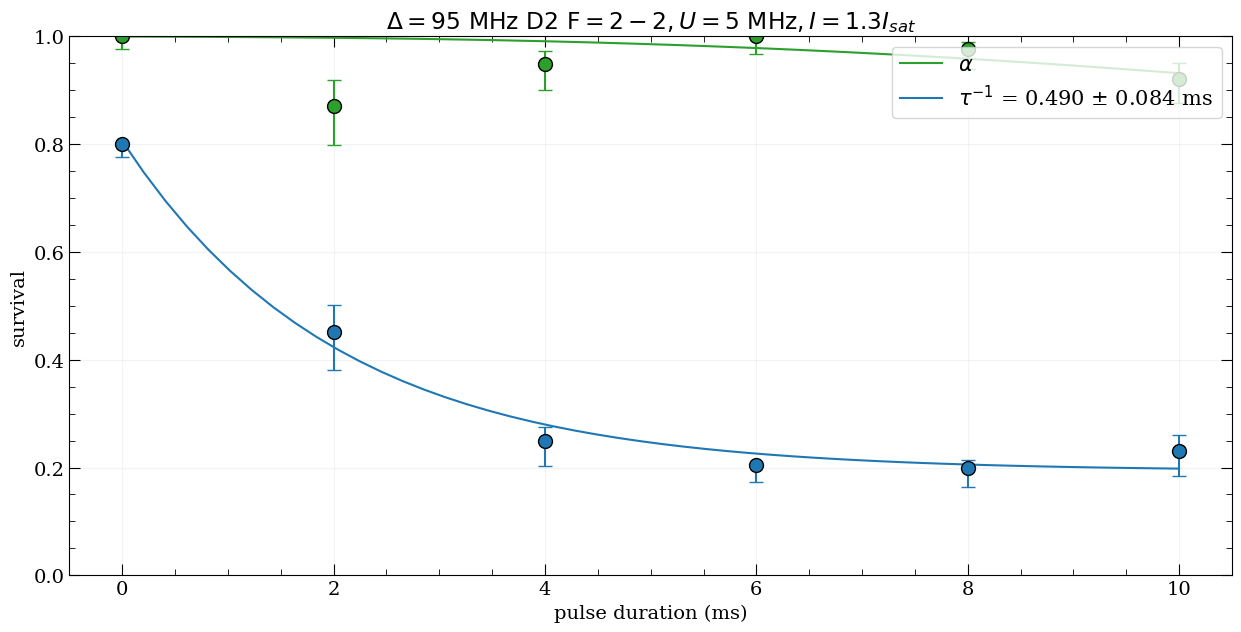

In [43]:
reloadMyModules(14,'December')  #10-12 = 1.2
fileId = 29
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.2
# load_two_y[5] = 0.2
num_points = 50
U0=.25e-3
T0=20e-6
U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 95 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_95,beta_U5_95_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_95,'+/-',beta_U5_95_unc)

### 75 MHz

beta = 9.334118814390084e-11 +/- 1.07270580964892e-11


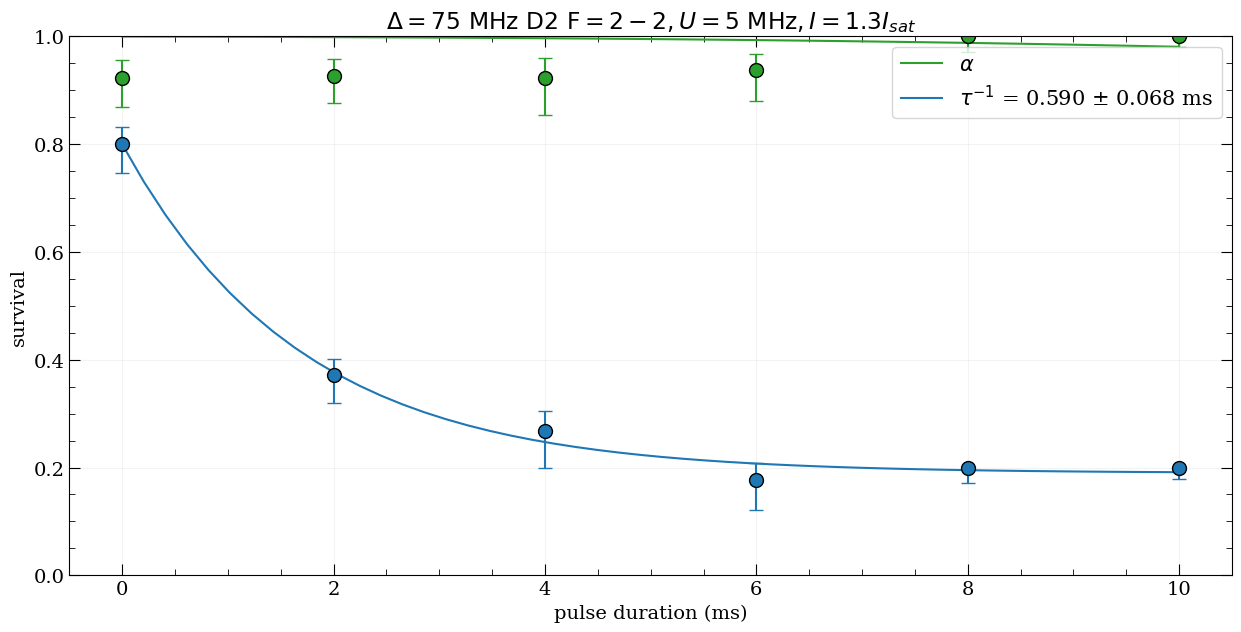

In [45]:
reloadMyModules(18,'December')
fileId = 27
threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.2
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_75,beta_U5_75_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_75,'+/-',beta_U5_75_unc)

### 55 MHz

beta = 5.63769599247579e-11 +/- 1.2594976114984018e-11


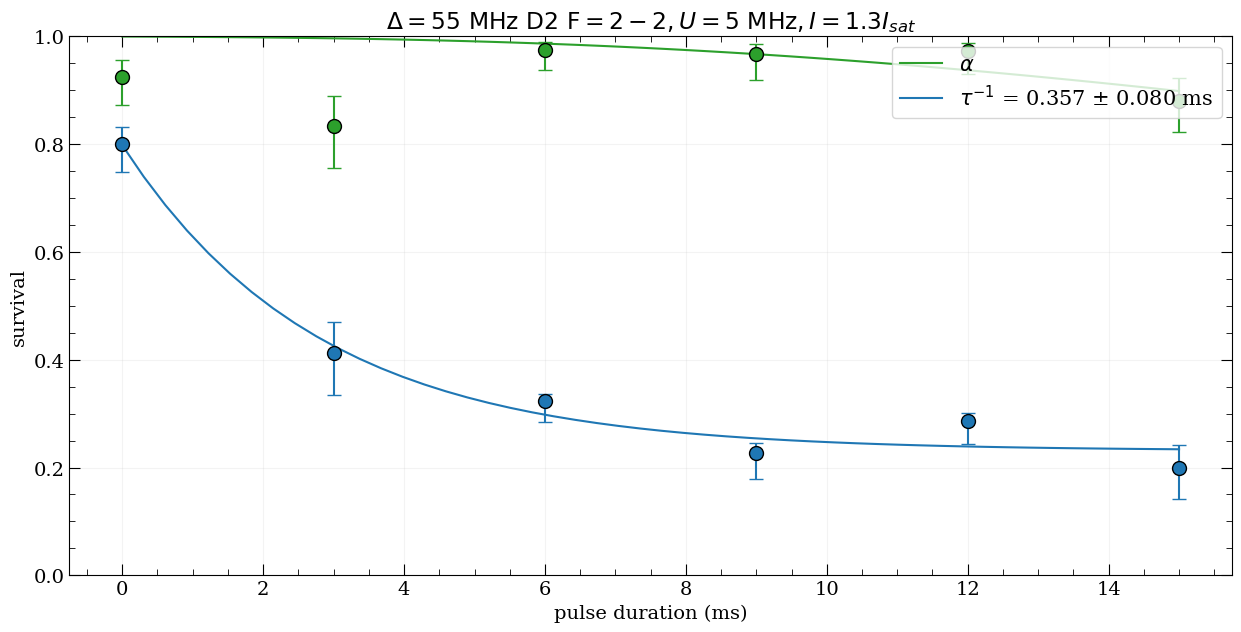

In [46]:
reloadMyModules(18,'December')
fileId = 41
threshold = 65

x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[5] = 0.2

num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 55 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_55,beta_U5_55_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_55,'+/-',beta_U5_55_unc)

### 30 MHz

beta = 3.335525489382088e-11 +/- 8.813750232849405e-12


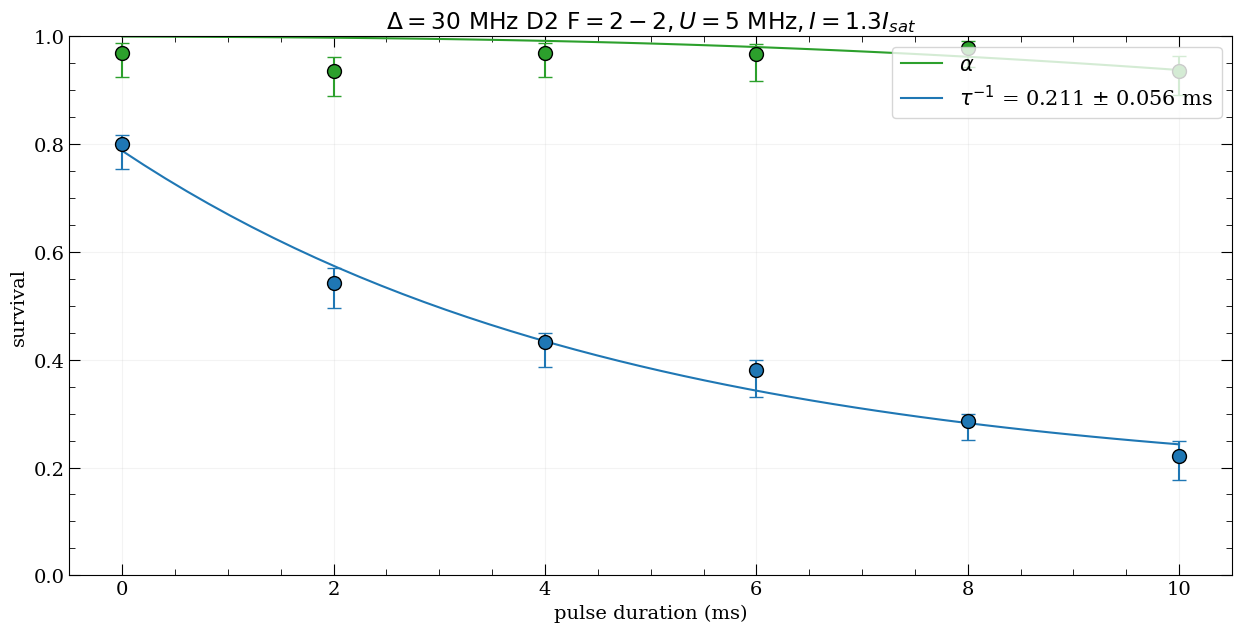

In [47]:

reloadMyModules(18,'December')
fileId = 36
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = .8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_5,T0_5,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 30 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=5 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U5_30,beta_U5_30_unc = lac.betaCalc(decay_constant,U0_5,T0_5,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U5_30,'+/-',beta_U5_30_unc)

# U=10 MHz

In [12]:
U0_10 = 0.5e-3
T0_10 = 30e-6
U0_unc=0.04693e-3
T0_unc=7e-6
w_r = 232.74/2*1e3*(2*np.pi)
w_r_unc = 0.76/2*1e3*(2*np.pi)
w_a = 50.375/2*1e3*(2*np.pi)
w_a_unc = 0.88/2*1e3*(2*np.pi)
w_unc = (w_r_unc**2 * w_a_unc)**(1/3)
w = (w_r**2 * w_a)**(1/3)

## 315 MHz 

In [18]:
reload(lac)

<module 'Analysis_Python_Files.CollisionalAnalysis' from '/Users/stevenpampel/Documents/B232_Data_Analysis/Data_Analysis_Notebook/LAC Paper/LAC_data_old/../../../Analysis_Python_Files/CollisionalAnalysis.py'>

beta = 1.5610306716637023e-11 +/- 4.448494684819796e-12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



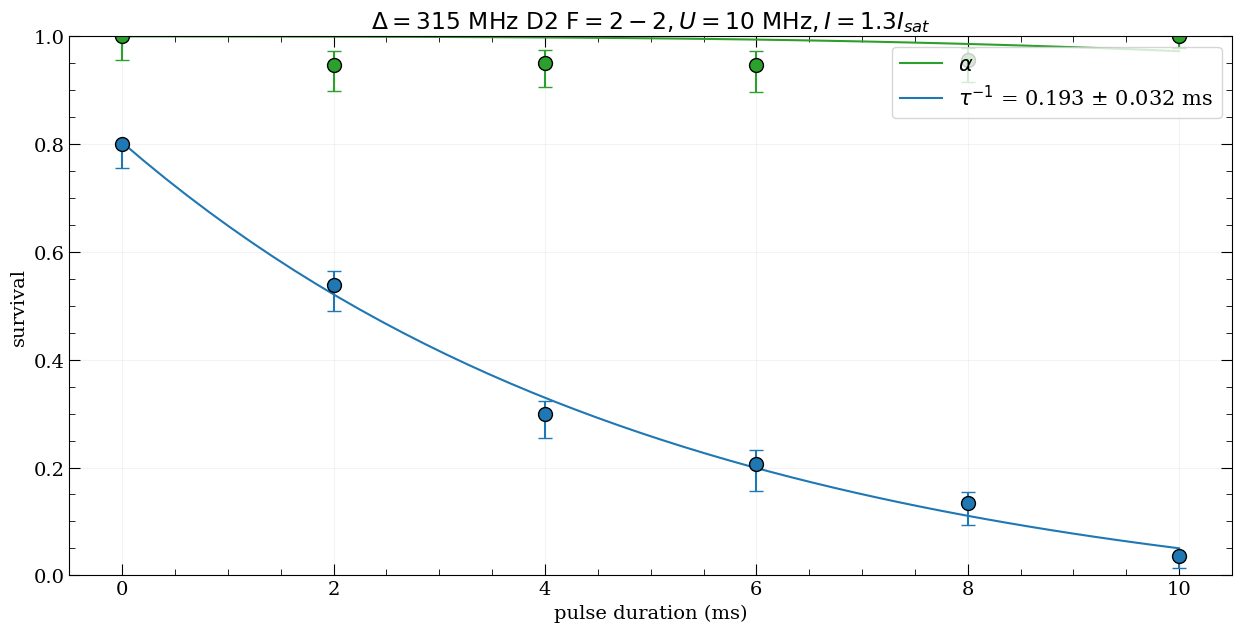

In [19]:
##pulse duration
reloadMyModules(18,'December')
fileId = 9
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[2] = 0.3
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 315 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_315,beta_U10_315_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_315,'+/-',beta_U10_315_unc)

## 250 MHz

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



beta = 2.1510933897074264e-11 +/- 6.391769619756408e-12


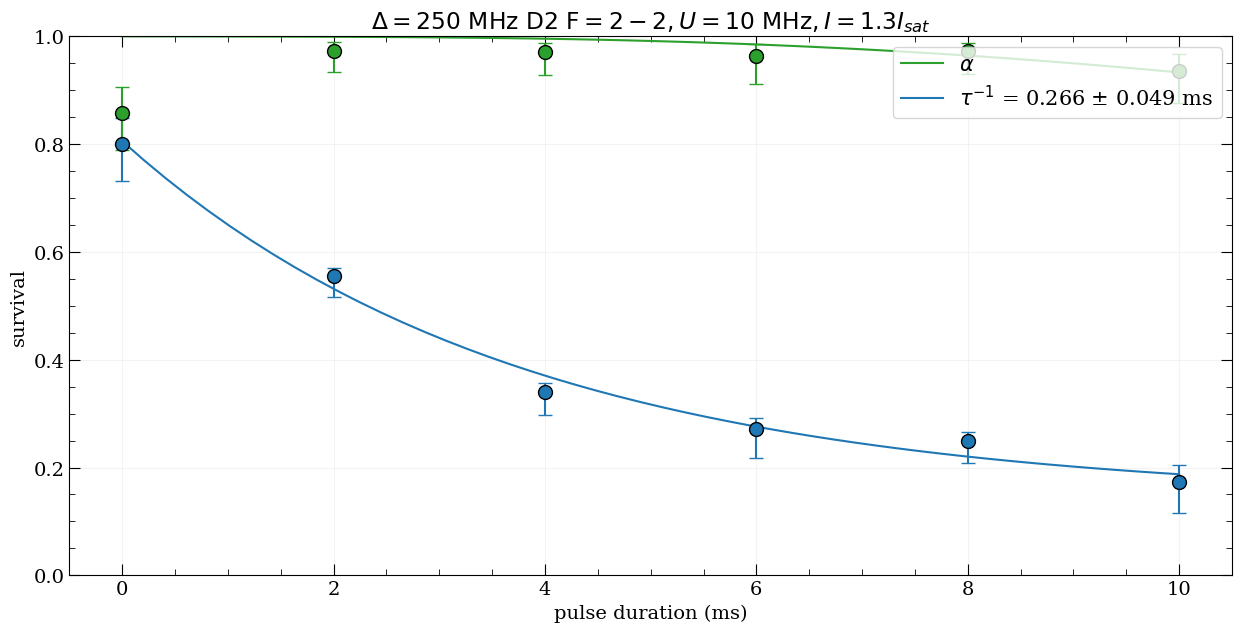

In [20]:
##pulse duration
reloadMyModules(17,'December')
fileId = 40

threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.25
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 250 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_250,beta_U10_250_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_250,'+/-',beta_U10_250_unc)

## 185 MHz 

beta = 2.767915861903037e-11 +/- 7.288743677191272e-12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



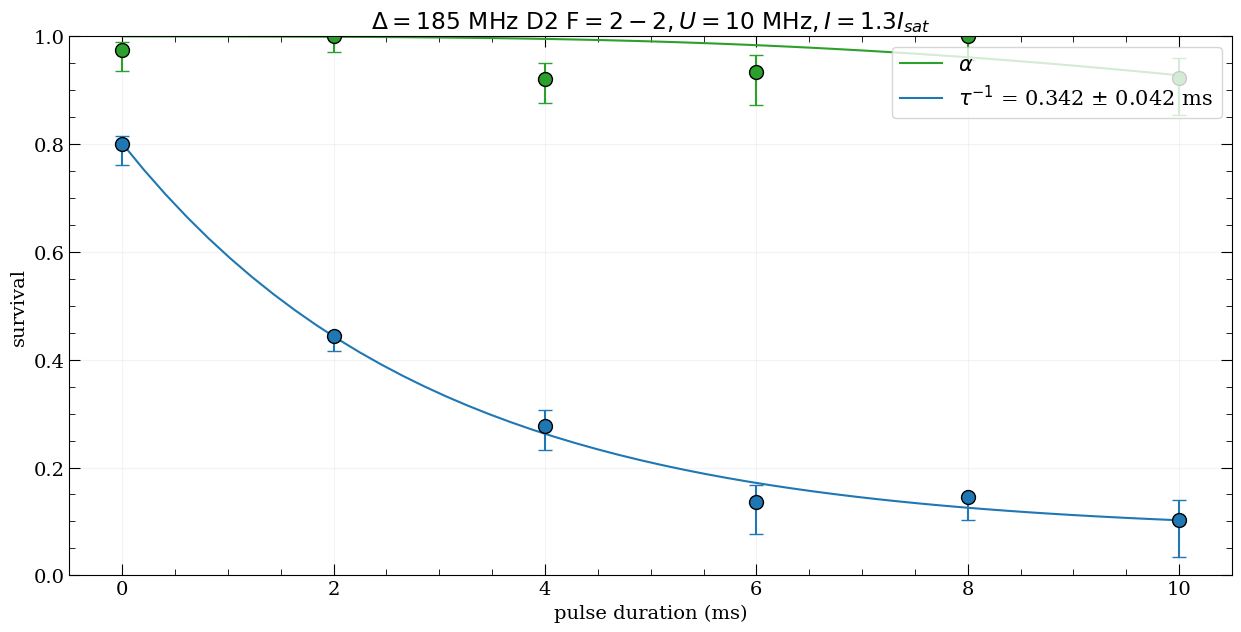

In [21]:
##pulse duration
reloadMyModules(18,'December')
fileId = 4

threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 185 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_185,beta_U10_185_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_185,'+/-',beta_U10_185_unc)

## 145 MHz

beta = 3.171962671999341e-11 +/- 1.0024856954122759e-11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



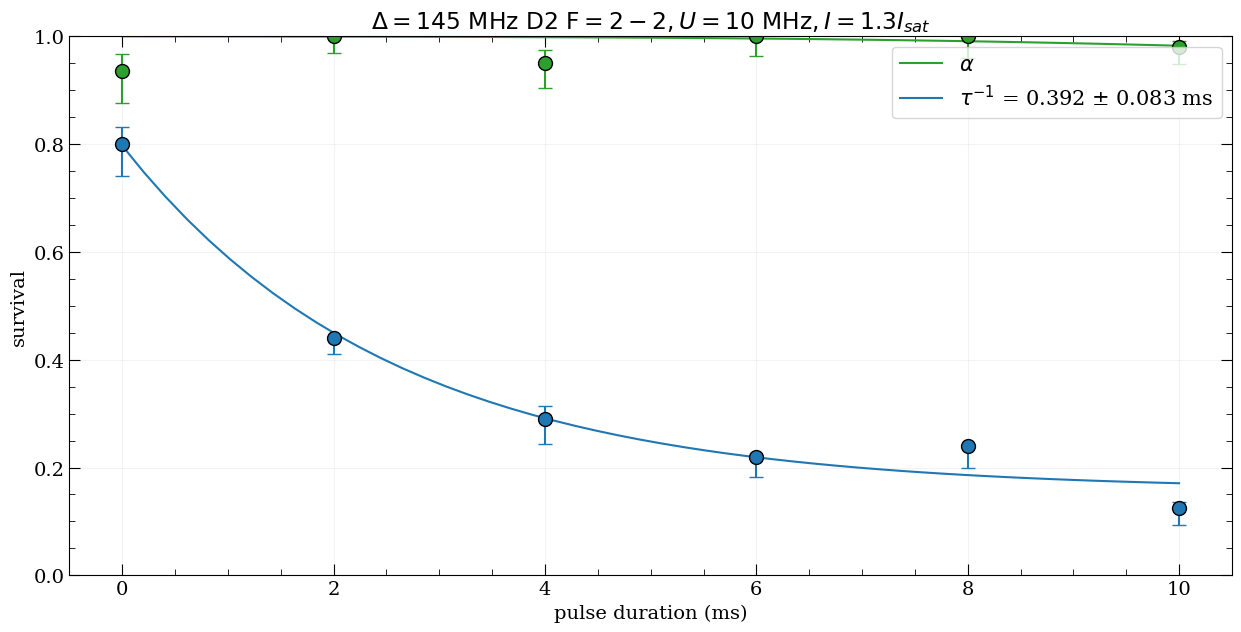

In [22]:
##pulse duration
reloadMyModules(17,'December')
fileId = 26
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[5] = 0.2
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 145 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_145,beta_U10_145_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_145,'+/-',beta_U10_145_unc)

## 120 MHz

beta = 4.0018261999862306e-11 +/- 1.0753051648344812e-11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



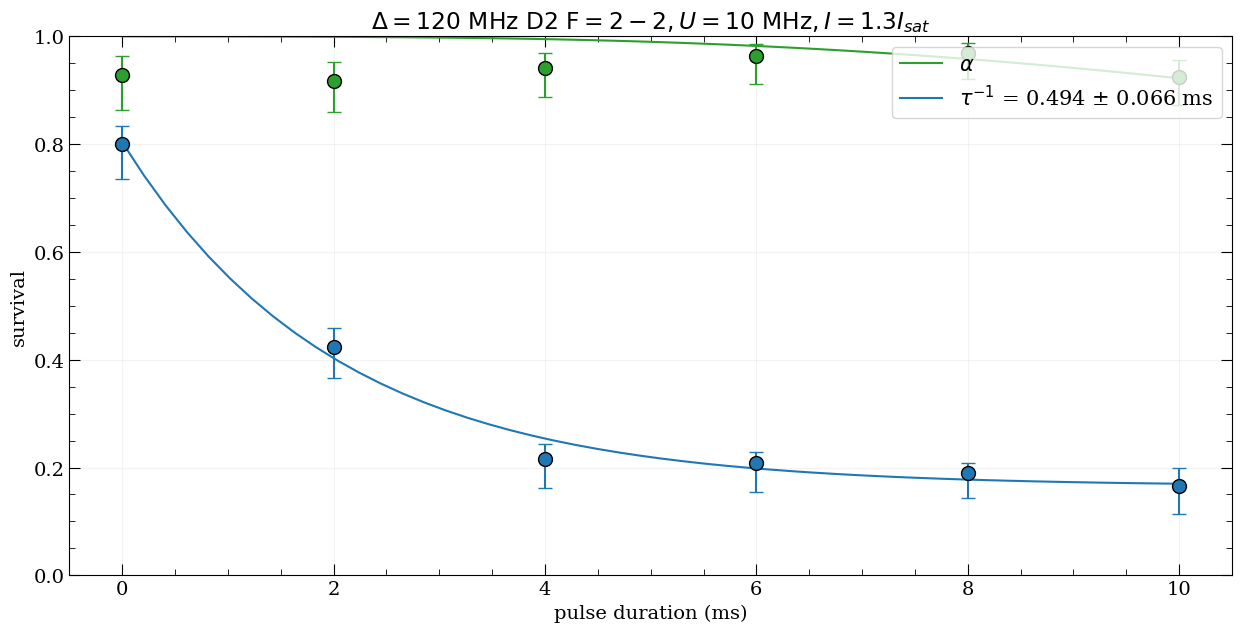

In [23]:
reloadMyModules(17,'December')  #17-20 bigger error bars
fileId = 11


threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 120 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_120,beta_U10_120_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_120,'+/-',beta_U10_120_unc)

## 100 MHz

beta = 4.9540847815908876e-11 +/- 1.7638723872530534e-11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



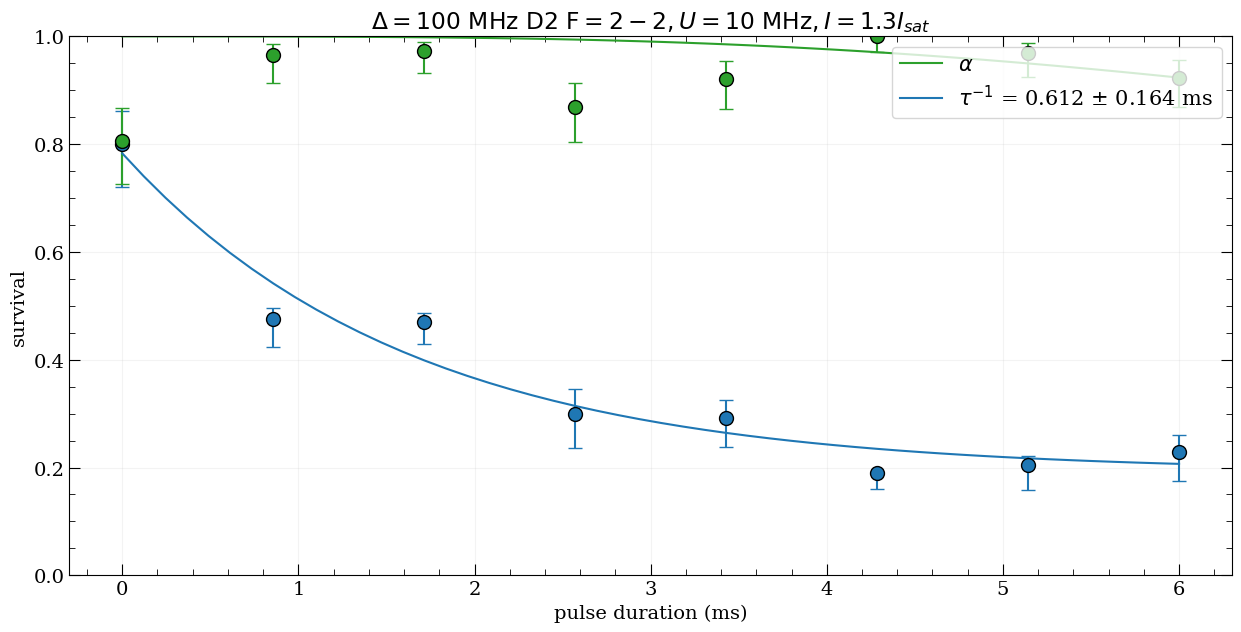

In [24]:
##pulse duration
reloadMyModules(17,'December')
fileId = 15
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[3] = 0.3
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 100 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_100,beta_U10_100_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_100,'+/-',beta_U10_100_unc)

## 80 MHz

beta = 5.842204029644888e-11 +/- 1.8315000943029988e-11


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



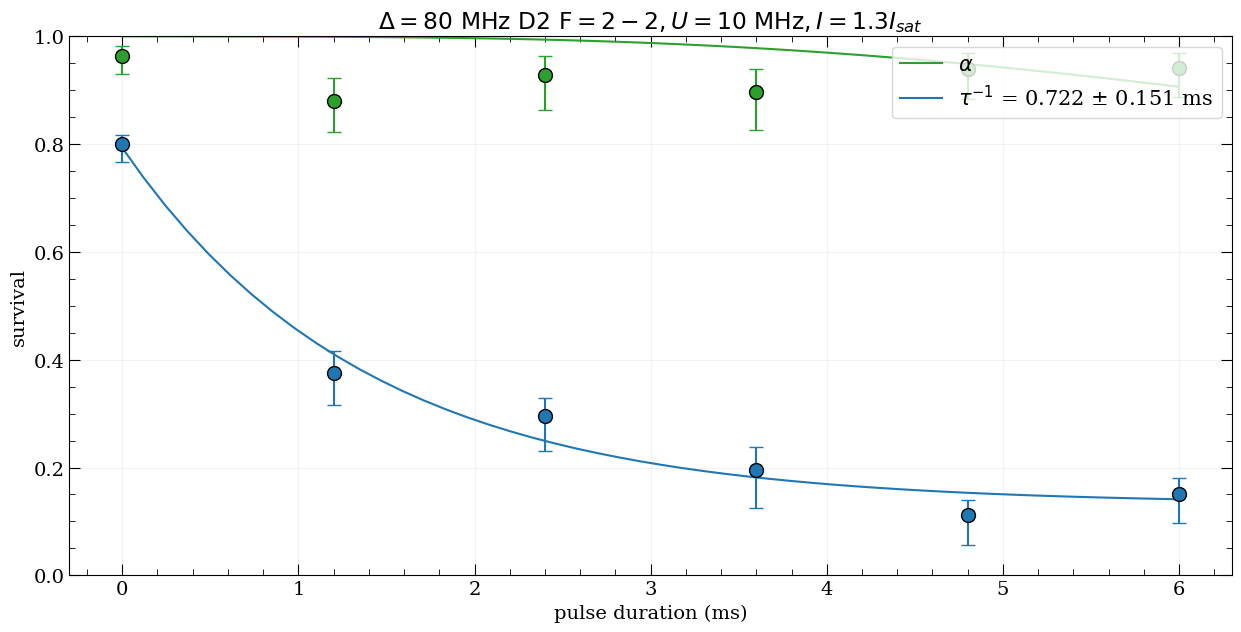

In [25]:
##pulse duration
reloadMyModules(17,'December')
fileId = 12
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 80 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_80,beta_U10_80_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_80,'+/-',beta_U10_80_unc)

## 60 MHz

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



beta = 3.5082831442063727e-11 +/- 1.3835459168548383e-11


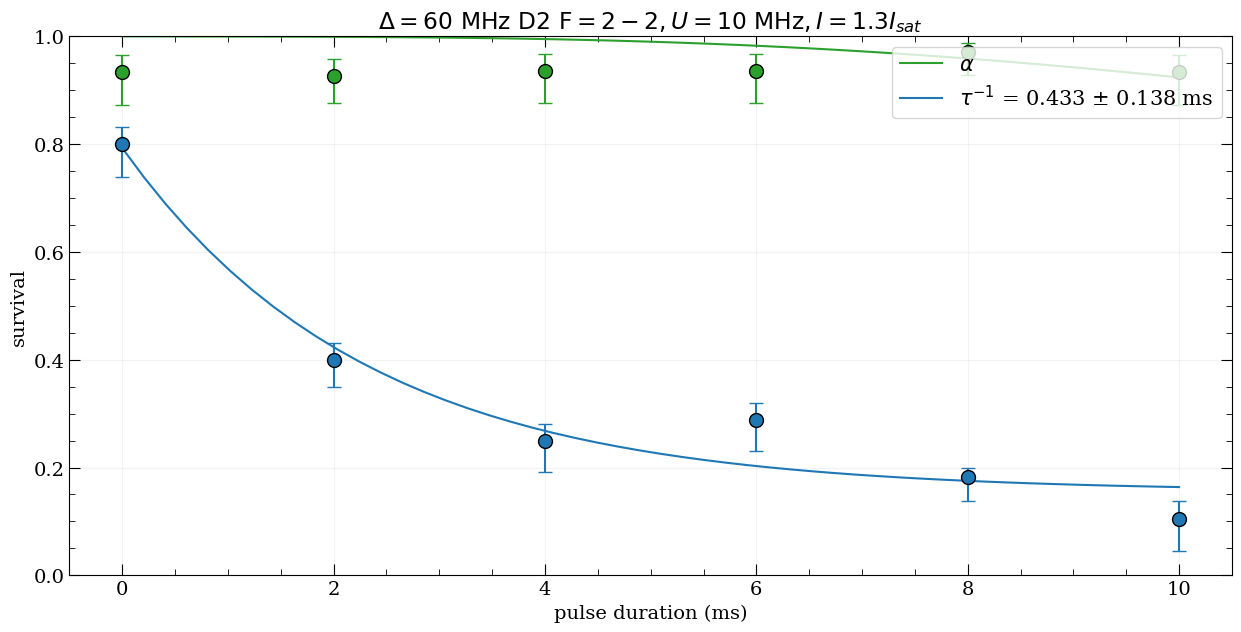

In [26]:
##pulse duration
reloadMyModules(17,'December')
fileId = 18
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])


# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 60 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_60,beta_U10_60_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_60,'+/-',beta_U10_60_unc)

## 35 MHz

beta = 1.9232358496953435e-11 +/- 8.435535275820105e-12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



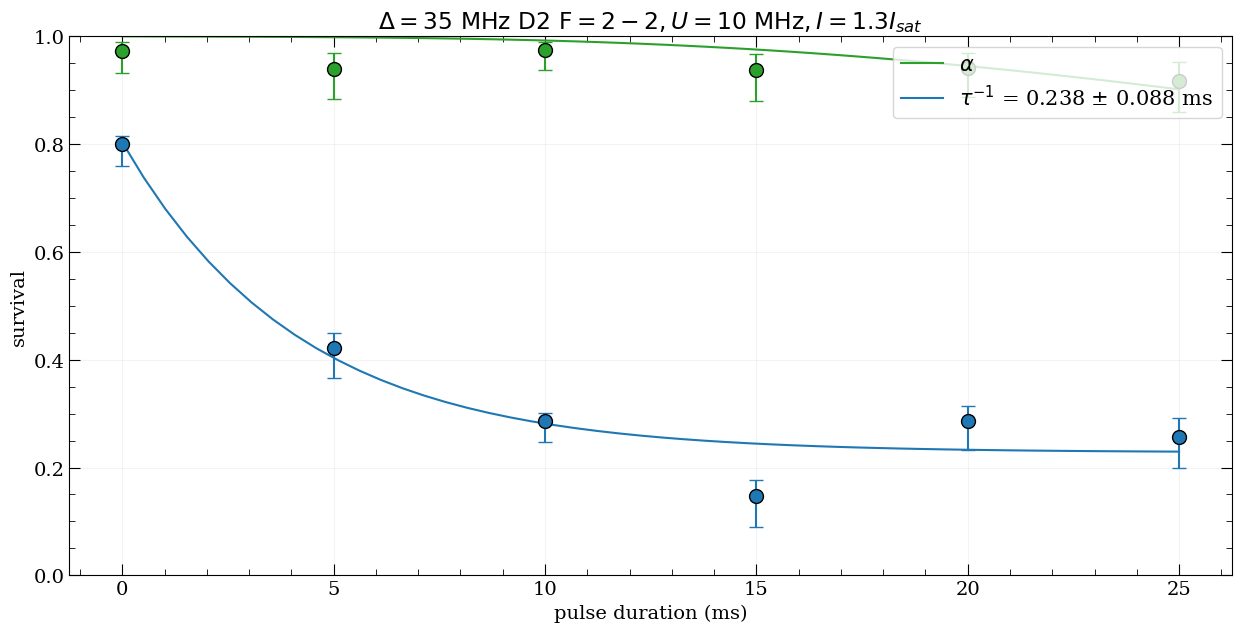

In [27]:
##pulse duration
reloadMyModules(16,'December')
fileId = 10 
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)


fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_10,T0_10,alpha_guess=alpha_guess,num_points = num_points)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \Delta = 35 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-2}, U=10 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U10_35,beta_U10_35_unc = lac.betaCalc(decay_constant,decay_unc,w,w_unc,T0_10,T0_unc)
print('beta =',beta_U10_35,'+/-',beta_U10_35_unc)

# U = 20 MHz

In [59]:
U0_20 = 1e-3
U0_unc = 0.04693e-3
T0_20 = 30e-6
T0_20_unc = 5e-6

### 250 MHz

beta = 1.2525020312291381e-11 +/- 1.262820208186035e-12


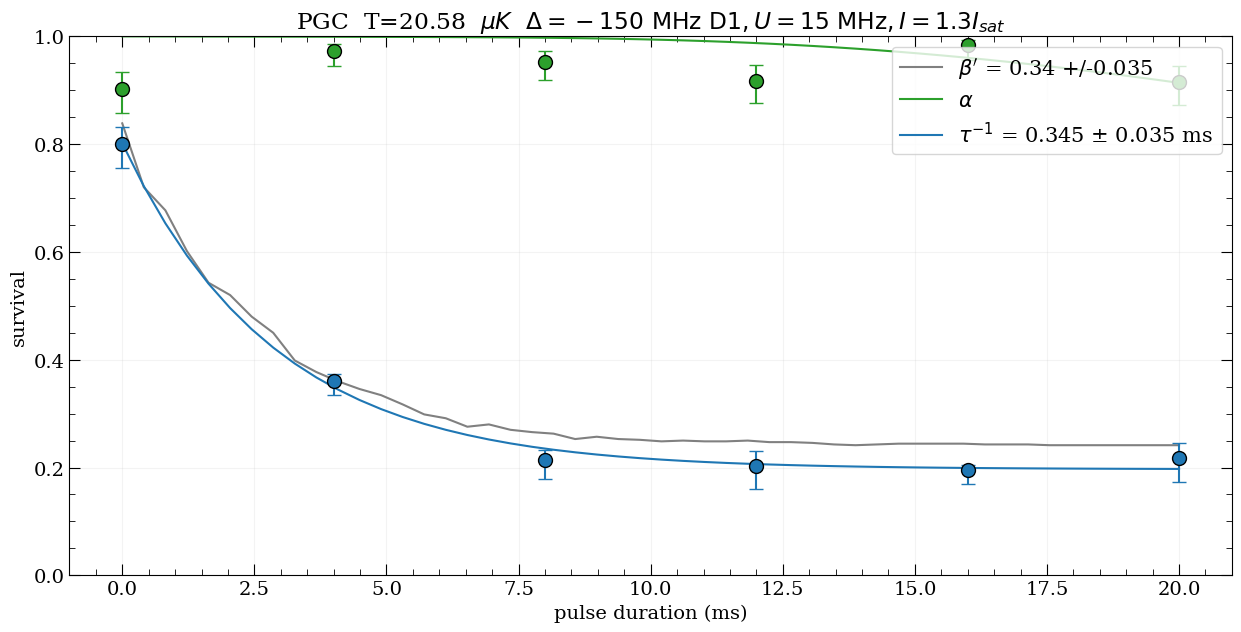

In [60]:
# reloadMyModules(14) file id 29 beta' = .469
reloadMyModules(30,'January','2024')
fileId = 19
threshold = 65

x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

T0 = T0_20
T0_unc = T0_20_unc
num_points = 50
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points 
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_20, T0,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
_,x_fit,y_fit,decay_unc = lac.decay_fit(x_data,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])
beta_prime = decay_constant
total_unc = decay_unc
# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=.2,range_step=0.01)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha,asymp=0.23), 
        label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y, U0_20, T0,alpha_guess=alpha_guess,num_points = num_points,plot_tau=True)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'PGC  T=20.58  $  \mu K  \ \ \Delta = -150 \ \mathrm{MHz} \ \mathrm{D1}, U=15 \ \mathrm{MHz}, I=1.3I_{sat} $');

beta_U20_250,beta_U20_250_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc,U0_unc,T0_unc)
print('beta =',beta_U20_250,'+/-',beta_U20_250_unc)

### 200 MHz

beta = 3.179338017040352e-11 +/- 6.964406737623908e-12


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning:

Covariance of the parameters could not be estimated



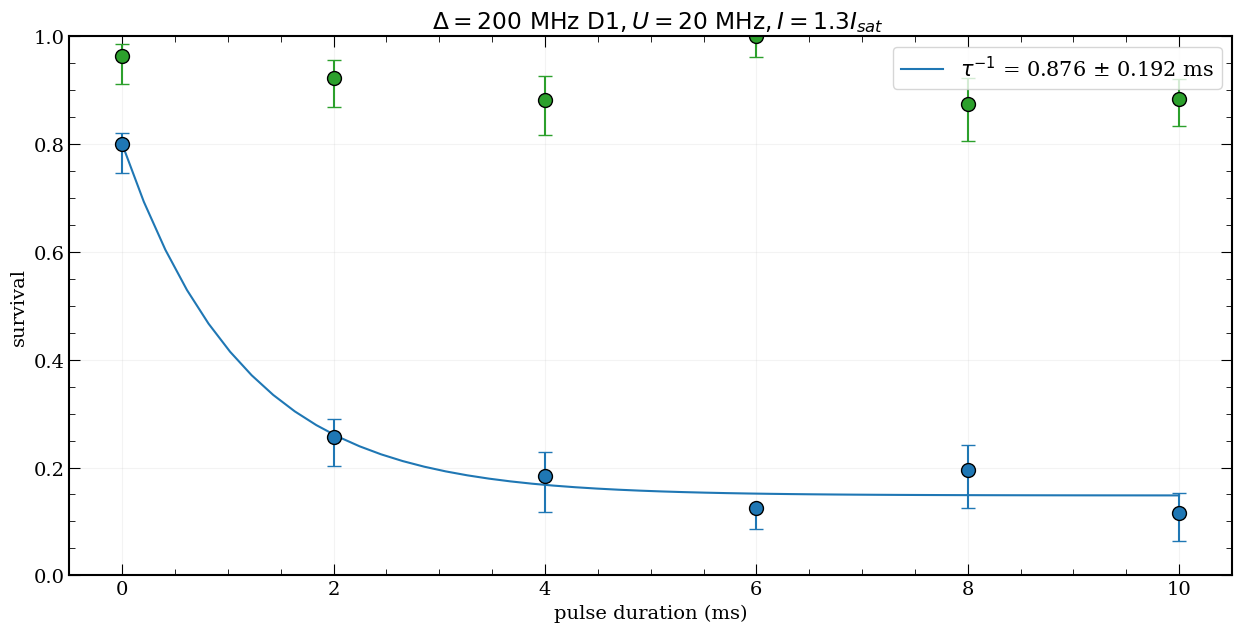

In [83]:
#reloadMyModules(14) fID 16
reloadMyModules(31,'January','2024')
fileId = 2

threshold = 70
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[5] = 0.2
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data,load_one_y,load_two_y,U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 200 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_200,beta_U20_200_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_200,'+/-',beta_U20_200_unc)

### 175 MHz

beta = 2.279433777670032e-11 +/- 6.697566243645352e-12


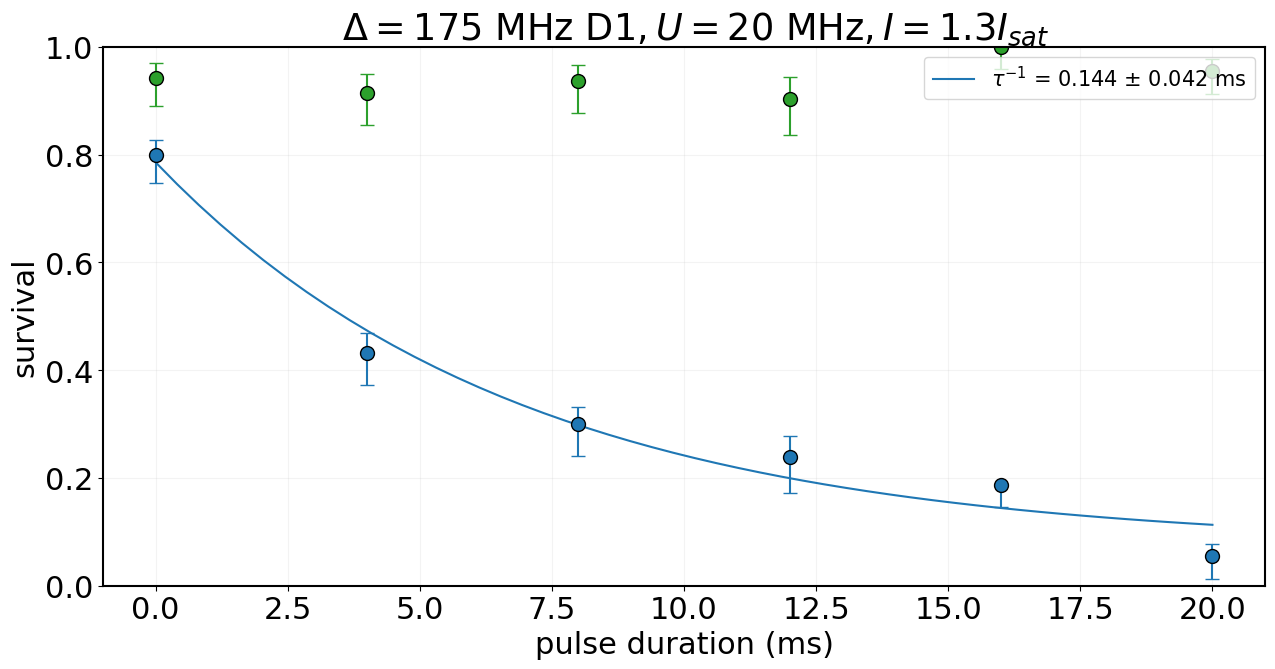

In [427]:
reloadMyModules(18)
fileId = 22
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 175 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_175,beta_U20_175_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_175,'+/-',beta_U20_175_unc)

### 150 MHz

beta = 4.401069051497227e-11 +/- 9.201782710865687e-12


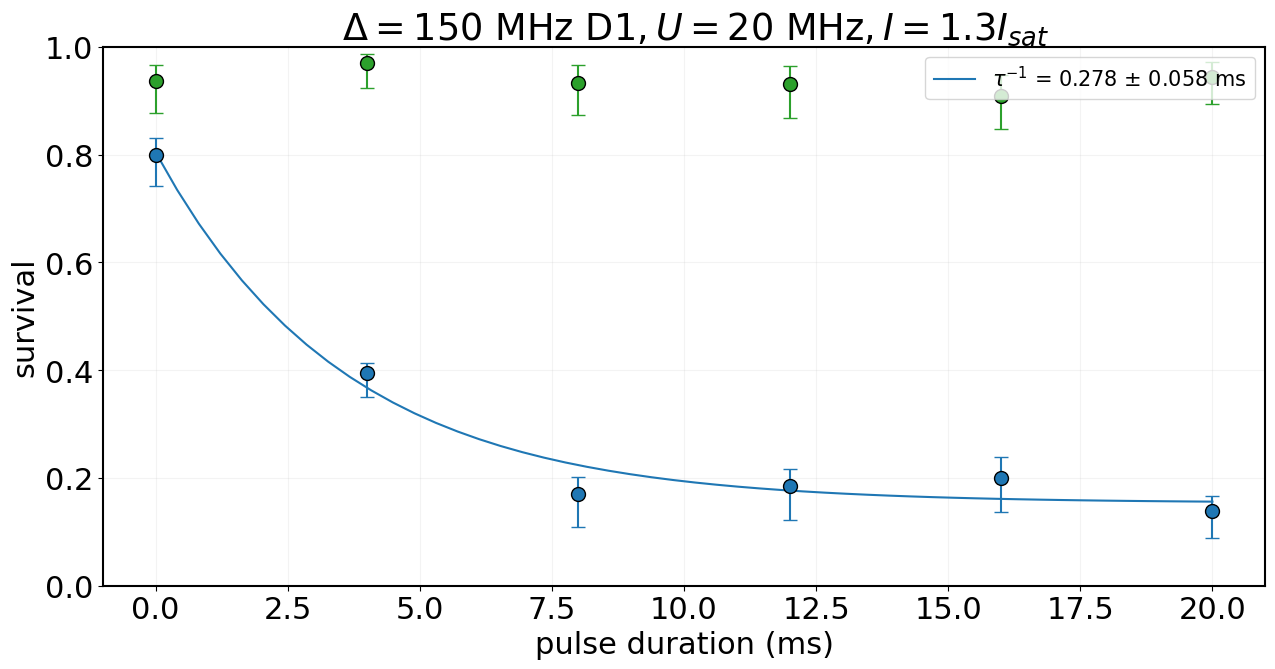

In [417]:
reloadMyModules(18)
fileId = 21
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.2
num_points = 50
U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_150,beta_U20_150_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_150,'+/-',beta_U20_150_unc)

### 125 MHz

beta = 6.736718397675836e-11 +/- 2.448117141442289e-11


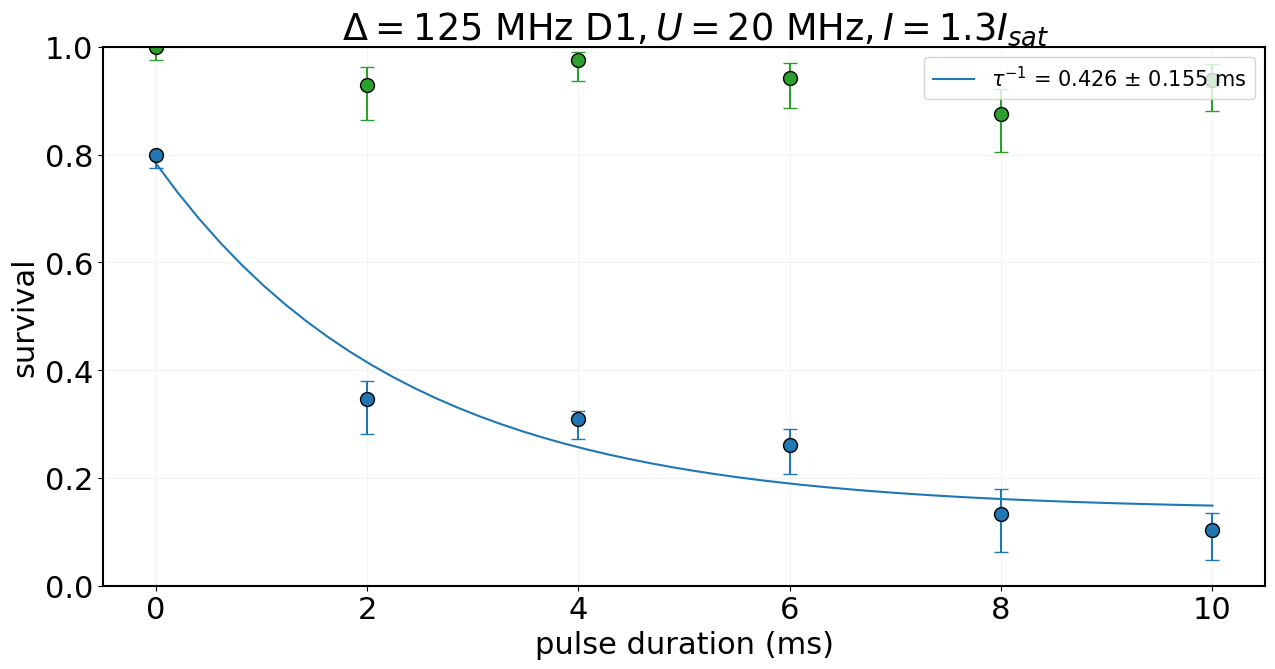

In [425]:
reloadMyModules(18) 
fileId = 26
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8

num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y,U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 125 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_125,beta_U20_125_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_125,'+/-',beta_U20_125_unc)

### 100 MHz

beta = 8.982541005224605e-11 +/- 1.4622966923724442e-11


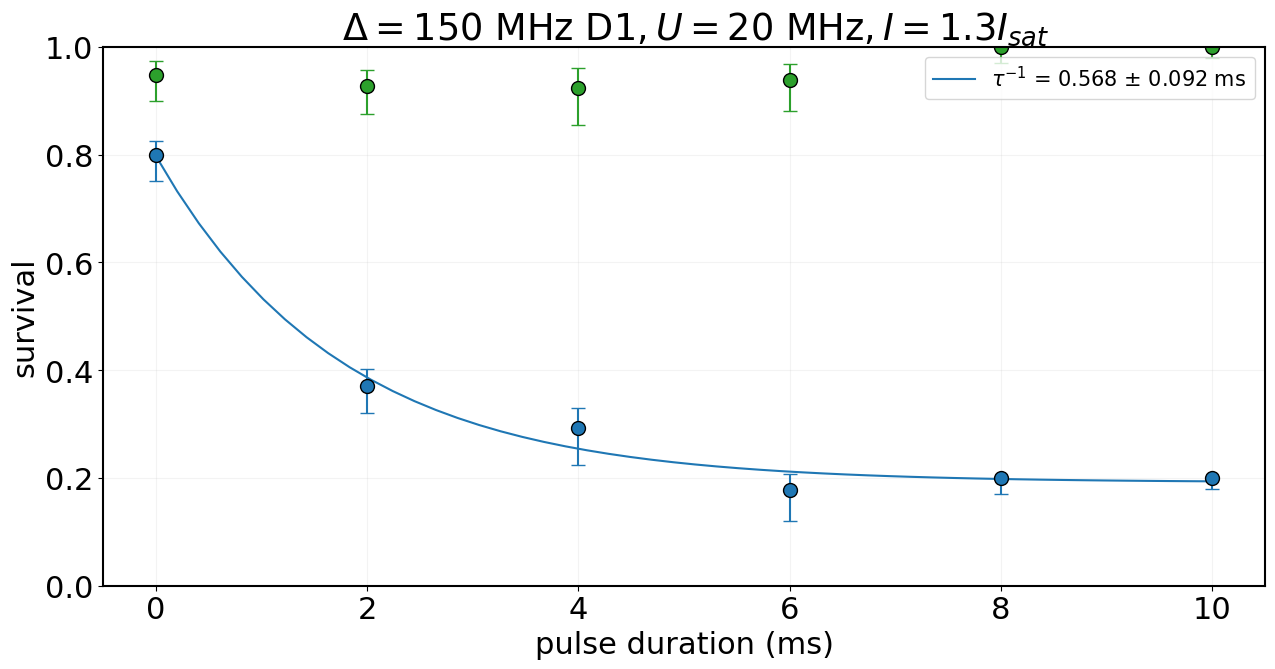

In [435]:
reloadMyModules(18)
fileId = 27
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
load_two_y[4] = 0.2
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 150 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_100,beta_U20_100_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_100,'+/-',beta_U20_100_unc)

### 75 MHz 

beta = 1.244101048784144e-10 +/- 2.5762554863945645e-11


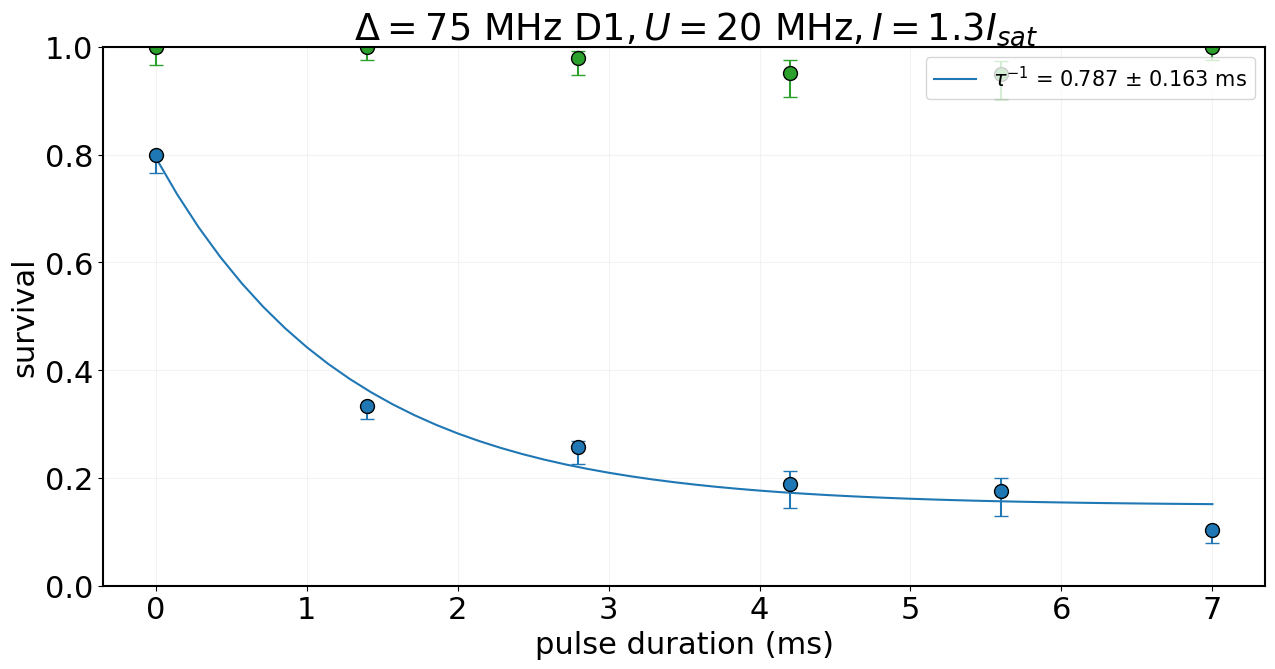

In [437]:
reloadMyModules(18)
fileId = 28
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 75 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_75,beta_U20_75_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_75,'+/-',beta_U20_75_unc)

### 55 MHz

beta = 1.244101048784144e-10 +/- 2.5762554863945645e-11


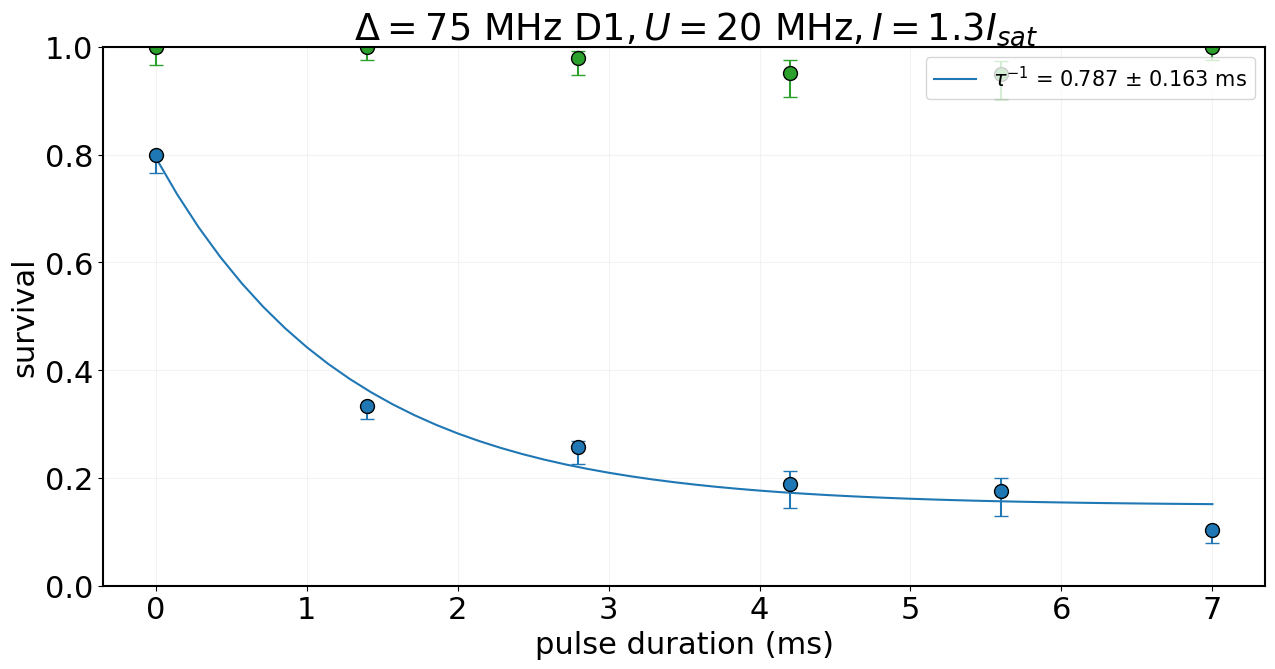

In [412]:
reloadMyModules(18)
fileId = 28
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.2
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 75 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_55,beta_U20_55_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_55,'+/-',beta_U20_55_unc)

### 25 MHz

beta = 1.244101048784144e-10 +/- 2.5762554863945645e-11


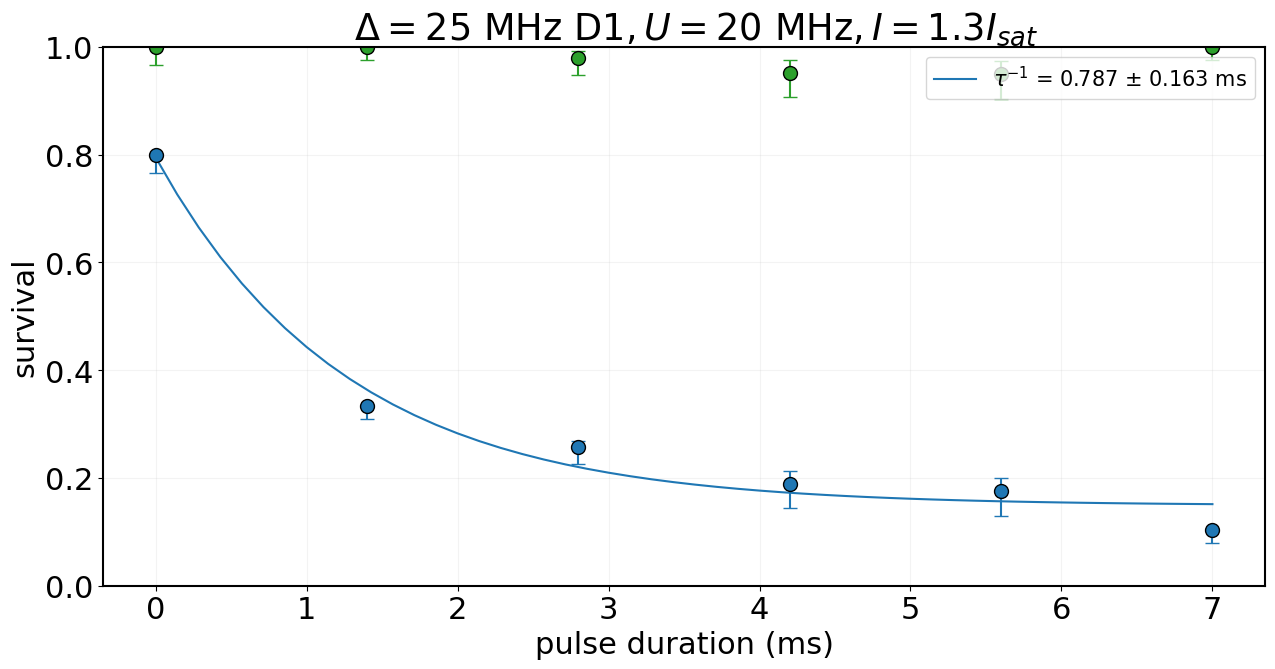

In [440]:
reloadMyModules(18)
fileId = 28
threshold = 65
x_data,load_one_y,load_one_err,load_two_y,load_two_err,surv_unc = ta.getCollisionalData(fileId, loadOneOpt,loadTwoOpt,threshold=threshold);
load_two_y[0] = 0.8
# load_two_y[4] = 0.2
num_points = 50

U0_unc=0.04693e-3
T0_unc=7e-6
alpha_guess = 1e-6
uncertainties = [surv_unc]*num_points # for exponential fit of data
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20, T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha=False,plot_tau=False)
asd,x_fit,y_fit,decay_unc = lac.decay_fit(x_data*1e-6,load_two_y,num_points = num_points,plot=False)

fig,ax = plt.subplots(1, figsize=[15,7])

# beta_prime,high_err,low_err = lac.beta_prime_fit(decay_constant,alpha,uncertainties,x_fit,y_fit,range_lim=2,range_step=0.1)
# total_unc = np.sqrt(((high_err+low_err)/2)**2 + decay_unc**2) 
# ax.plot(x_fit, lac.two_body_loss_sim(x_fit,beta_prime,alpha), 
#         label= f"$\\beta^{{\\prime}}$ = {beta_prime:.2f} +/-{total_unc:.3f} ",color='grey')

ax.errorbar(x_data,load_two_y, yerr=load_two_err,ls='none',ecolor=color2,marker = 'o',markersize = markersize,
            markerfacecolor=color2,markeredgecolor='k',capsize=capsize)


ax.errorbar(x_data,load_one_y, yerr=load_one_err,ls='none',ecolor=color1,marker = 'o',markersize = markersize,
            markerfacecolor=color1,markeredgecolor='k',capsize=capsize)
alpha, decay_constant = lac.beta_fit_guess(x_data*1e-6,load_one_y,load_two_y, U0_20,T0_20,alpha_guess=alpha_guess,num_points = num_points,plot_alpha = False)
ticks = np.arange(x_data[0], max(x_data),len(x_data))
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.title(r'$ \ \ \Delta = 25 \ \mathrm{MHz} \ \mathrm{D1}, U=20 \ \mathrm{MHz}, I=1.3I_{sat} $');


# print(decay_unc)
beta_U20_25,beta_U20_25_unc = lac.betaCalc(decay_constant,U0_20,T0_20,decay_unc*1e-6,U0_unc,T0_unc)
print('beta =',beta_U20_25,'+/-',beta_U20_25_unc)

# rate plot

In [619]:
beta_U5_140_unc

0.001

In [29]:
LS_5MHz = 8
LS_10MHz = 16
LS_20MHz = 32

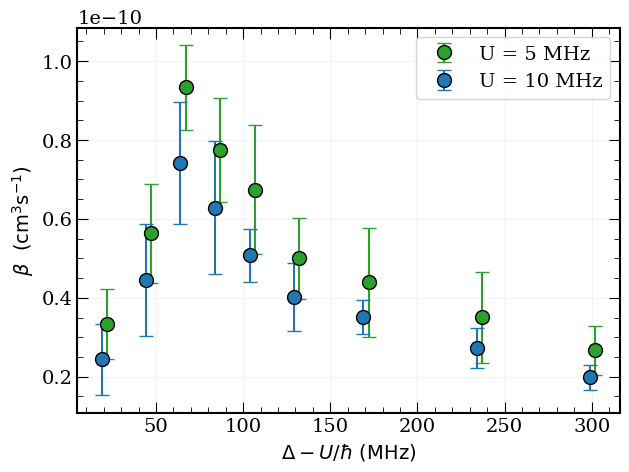

In [87]:
################## 5 MHz
detuning_5MHz = [30,55,75,95,115,140,180,245,310]
detuning_5MHz_LS = [delta-LS_5MHz for delta in detuning_5MHz]


beta_5MHz = [beta_U5_30,beta_U5_55,beta_U5_75,
                beta_U5_95,beta_U5_115,beta_U5_140,
                   beta_U5_180,beta_U5_245,beta_U5_310]
              
beta_unc_5MHz = [beta_U5_30_unc,beta_U5_55_unc,beta_U5_75_unc,
                beta_U5_95_unc,beta_U5_115_unc/1.5,beta_U5_140_unc,
                   beta_U5_180_unc,beta_U5_245_unc,beta_U5_310_unc]

beta_error_bar_5MHz = [beta_unc_5MHz,beta_unc_5MHz]

################## 10 MHz
detuning_10MHz = [35,60,80,100,120,145,185,250,315]
detuning_10MHz_LS = [delta-LS_10MHz for delta in detuning_10MHz]
beta_10MHz = [beta_U10_35,beta_U10_60,beta_U10_80,
                beta_U10_100,beta_U10_120,beta_U10_145,
                   beta_U10_185,beta_U10_250,beta_U10_315]
              
beta_unc_10MHz = [beta_U10_35_unc,beta_U10_60_unc,beta_U10_80_unc,
                beta_U10_100_unc,beta_U10_120_unc,beta_U10_145_unc,
                   beta_U10_185_unc,beta_U10_250_unc,beta_U10_315_unc]


beta_error_bar_10MHz = [beta_unc_10MHz,beta_unc_10MHz]


beta_error_bar_5MHz = [beta_unc_5MHz,beta_unc_5MHz]

################## 20 MHz
detuning_20_MHz = [30,55,75,95,115,140,180,245,310]
detuning_20MHz_LS = [delta-LS_20MHz for delta in detuning_20_MHz]
beta_20MHz = [beta_U20_30,beta_U20_55,beta_U20_75,
                beta_U20_95,beta_U20_115,beta_U20_140,
                   beta_U20_180,beta_U20_245,beta_U20_310]
              
beta_unc_20MHz = [beta_U20_30_unc,beta_U20_55_unc,beta_U20_75_unc,beta_U20_95_unc,
                beta_U20_115_unc,beta_U20_140_unc,beta_U20_180_unc,
                   beta_U20_245_unc,beta_U20_310_unc]

beta_error_bar_20MHz = [beta_unc_20MHz,beta_unc_20MHz]


fig,ax = plt.subplots(1, figsize=[7,5])

ax.errorbar(detuning_5MHz_LS,beta_5MHz, yerr=beta_error_bar_5MHz,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label = 'U = 5 MHz')

ax.errorbar(detuning_10MHz_LS,beta_10MHz, yerr=beta_error_bar_10MHz,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label = 'U = 10 MHz')



# ax.errorbar(detuning_20MHz_LS,beta_20MHz, yerr=beta_error_bar_20MHz,ls='none',ecolor='tab:red',marker = 'o',markersize = 10,
#             markerfacecolor='tab:red',markeredgecolor='k',capsize=5,label = 'U = 5 MHz')

plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\Delta - U/\hbar \ (\mathrm{MHz})$')
plt.legend()
# # plt.title('D1, U = 10 MHz, I = 3S') 
plt.rcParams["axes.linewidth"] = 1.5
# # plt.ticklabel_format(style='plain') 

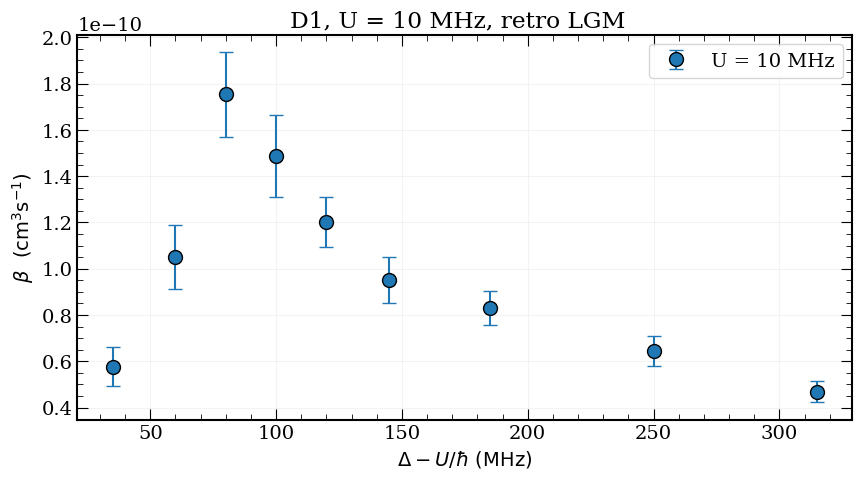

In [38]:

################## 10 MHz
detuning_10MHz = [35,60,80,100,120,145,185,250,315]
# detuning_10MHz_LS = [delta-LS_10MHz for delta in detuning_10MHz]
beta_10MHz = [beta_U10_35,beta_U10_60,beta_U10_80,
                beta_U10_100,beta_U10_120,beta_U10_145,
                   beta_U10_185,beta_U10_250,beta_U10_315]
              
beta_unc_10MHz = [beta_U10_35_unc,beta_U10_60_unc,beta_U10_80_unc,
                beta_U10_100_unc,beta_U10_120_unc,beta_U10_145_unc,
                   beta_U10_185_unc,beta_U10_250_unc,beta_U10_315_unc]


beta_error_bar_10MHz = [beta_unc_10MHz,beta_unc_10MHz]





fig,ax = plt.subplots(1, figsize=[10,5])

ax.errorbar(detuning_10MHz,np.array(beta_10MHz)*3, yerr=beta_error_bar_10MHz,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label = 'U = 10 MHz')

plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\Delta - U/\hbar \ (\mathrm{MHz})$')
plt.legend()
plt.title('D1, U = 10 MHz, retro LGM  ') 
plt.rcParams["axes.linewidth"] = 1.5
# # plt.ticklabel_format(style='plain') 

In [41]:
print(list[np.array(beta_error_bar_10MHz)*3])

list[array([[2.53066058e-11, 4.15063775e-11, 5.49450028e-11, 5.29161716e-11,
        3.22591549e-11, 3.00745709e-11, 2.18662310e-11, 1.91753089e-11,
        1.33454841e-11],
       [2.53066058e-11, 4.15063775e-11, 5.49450028e-11, 5.29161716e-11,
        3.22591549e-11, 3.00745709e-11, 2.18662310e-11, 1.91753089e-11,
        1.33454841e-11]])]
